In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set()

f0 = 440

factor  = np.array([2 ** i for i in range(1,5)])

lower_octaves = f0 / factor
higer_octaves = f0 * factor

octaves = np.concatenate([lower_octaves[::-1],[f0],higer_octaves])

print(octaves,'\n')

octave_deltas = np.array([octaves[i] - octaves[i-1] for i in range(1,len(octaves))])

print(octave_deltas,'\n')

def twelth(delta=440):
    pow = np.arange (0,11)
    beta = np.power(2,1/12)
    
    note_intervals = delta[:,np.newaxis] * np.array(np.power(beta,pow))
    
    return np.array(note_intervals).flatten()


key_freq = twelth(octave_deltas)
print((key_freq))

key_interval = np.array([key_freq[i] - key_freq[i-1] for i in range(1,len(key_freq))])

print(key_interval)

fig,axes = plt.subplots(2,sharex=True)
axes[0].plot(key_freq,'o--')
axes[0].grid(True)
axes[0].set_xlabel('piano key')
axes[0].set_ylabel('frequency')
axes[0].set_yscale('log')

axes[1].plot(key_interval,'o--')
axes[1].grid(True)
axes[1].set_ylabel('key freq. delta')
axes[1].set_xlabel('key_interval')

In [ ]:
### CORRECT VERSION ###

import numpy as np
import matplotlib.pyplot as plt

f0 = 440

factor  = np.array([2 ** i for i in range(1,5)])

lower_octaves = f0 / factor
higer_octaves = f0 * factor

octaves = np.concatenate([lower_octaves[::-1],[f0],higer_octaves])

print(octaves,'\n')

def _12(octaves=octaves):
	_12_root_2 = np.power(2,1/12)
	
	
	return np.array(([octaves[j] * _12_root_2 ** i for 
		j in range(len(octaves)) for
	 		i in range(12)]))
	
notes = _12()
print (notes,'\n')
note_diffs = [notes[i] - notes[i-1] for i in range(1, len(notes))]

print (note_diffs)

fig,axes = plt.subplots(2,figsize=(18,12))
axes[0].plot(notes,'o--')
axes[0].grid(True)
axes[0].set_yscale('log')

axes[1].plot(note_diffs,'o--')
axes[1].set_yscale('log')
axes[1].grid(True)

In [ ]:
l = [i for 
     j in range (2) for 
         i in range(5)]

print (l)

In [127]:
notes_df = pd.DataFrame(np.array_split(notes,len(notes) / 12),columns=range(1,13),index=range(1,10))
notes_df.columns.name='note nr'
notes_df.index.name='octave'
notes_df

note nr,1,2,3,4,5,6,7,8,9,10,11,12
octave,,,,,,,,,,,,
1,27.5,29.135235,30.867706,32.703196,34.647829,36.708096,38.890873,41.203445,43.653529,46.249303,48.999429,51.913087
2,55.0,58.270470,61.735413,65.406391,69.295658,73.416192,77.781746,82.406889,87.307058,92.498606,97.998859,103.826174
3,110.0,116.540940,123.470825,130.812783,138.591315,146.832384,155.563492,164.813778,174.614116,184.997211,195.997718,207.652349
4,220.0,233.081881,246.941651,261.625565,277.182631,293.664768,311.126984,329.627557,349.228231,369.994423,391.995436,415.304698
5,440.0,466.163762,493.883301,523.251131,554.365262,587.329536,622.253967,659.255114,698.456463,739.988845,783.990872,830.609395
6,880.0,932.327523,987.766603,1046.502261,1108.730524,1174.659072,1244.507935,1318.510228,1396.912926,1479.977691,1567.981744,1661.218790
7,1760.0,1864.655046,1975.533205,2093.004522,2217.461048,2349.318143,2489.015870,2637.020455,2793.825851,2959.955382,3135.963488,3322.437581
8,3520.0,3729.310092,3951.066410,4186.009045,4434.922096,4698.636287,4978.031740,5274.040911,5587.651703,5919.910763,6271.926976,6644.875161
9,7040.0,7458.620184,7902.132820,8372.018090,8869.844191,9397.272573,9956.063479,10548.081821,11175.303406,11839.821527,12543.853951,13289.750323


In [128]:
### demo of general geometric growth - constant ratio between values of (here) x ###

x = np.array([ 2 ** i for i in range(0,10,1)])
print (x)
parts = 5 # number of intervals
factor = np.power(2,1/parts) # interval growth factor 

equidistant = np.array([x[j] * factor ** i for j in range(len(x)) for i in range(1,parts) ]) 
equidistant

[  1   2   4   8  16  32  64 128 256 512]


array([  1.14869835,   1.31950791,   1.51571657,   1.74110113,
         2.29739671,   2.63901582,   3.03143313,   3.48220225,
         4.59479342,   5.27803164,   6.06286627,   6.96440451,
         9.18958684,  10.55606329,  12.12573253,  13.92880901,
        18.37917368,  21.11212657,  24.25146506,  27.85761803,
        36.75834736,  42.22425314,  48.50293013,  55.71523605,
        73.51669472,  84.44850629,  97.00586026, 111.4304721 ,
       147.03338944, 168.89701258, 194.01172051, 222.8609442 ,
       294.06677888, 337.79402516, 388.02344103, 445.72188841,
       588.13355776, 675.58805032, 776.04688205, 891.44377682])

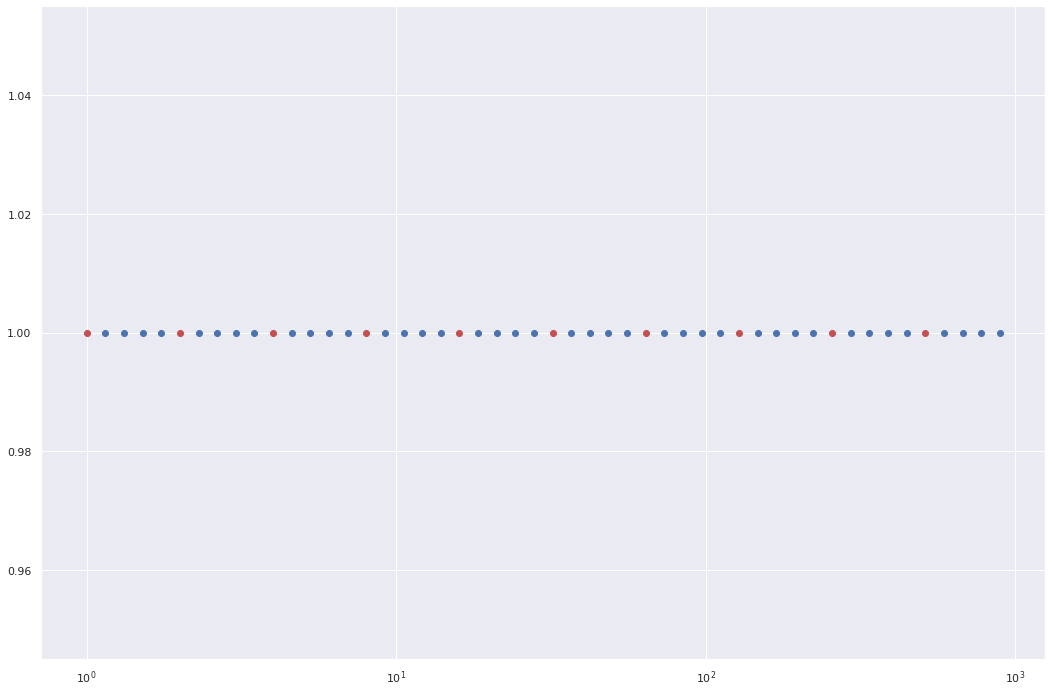

In [67]:
plt.figure(figsize=(18,12))
plt.plot(x,[1] * len(x),'ro')
plt.plot(equidistant,[1] * len(equidistant),'o')
plt.xscale('log')

In [100]:
### guitar ###
E2 = np.zeros(24)
A2 = np.zeros(24)
D3 = np.zeros(24)
G3 = np.zeros(24)
B3 = np.zeros(24)
E4 = np.zeros(24)


E2[0] = 82.41 
A2[0] = 110.00
D3[0] = 146.83
G3[0] = 196.00
B3[0] = 246.94
E4[0] = 329.63


def string_frequencies(root):
    r = np.power(2,1/12)
    
    string_freqs = []
    
    for fret in np.arange(1,24):
        string_freqs.append (root[0] * r ** fret)
        
    return string_freqs

E2[1:] = string_frequencies(E2)
A2[1:] = string_frequencies(A2)
D3[1:] = string_frequencies(D3)
G3[1:] = string_frequencies(G3)
B3[1:] = string_frequencies(B3)
E4[1:] = string_frequencies(E4)

guitar_string_freqs = pd.DataFrame({'E2' : E2,
                                   'A2' : A2,
                                   'D3' : D3,
                                   'G3' : G3,
                                   'B3' : B3,
                                   'E4' : E4},index=range(1,25))

guitar_string_freqs.columns.name='string'
guitar_string_freqs.index.name='fret'

guitar_string_freqs
#### sixth fret string n gives open string n+1, except for G3, where it is 5th fret ###

string,E2,A2,D3,G3,B3,E4
fret,,,,,,
1,82.410000,110.000000,146.830000,196.000000,246.940000,329.630000
2,87.310354,116.540940,155.560966,207.654766,261.623817,349.230820
3,92.502097,123.470825,164.811103,220.002561,277.180778,369.997165
4,98.002558,130.812783,174.611281,233.084595,293.662805,391.998341
5,103.830094,138.591315,184.994208,246.944526,311.124904,415.307776
6,110.004152,146.832384,195.994536,261.628611,329.625354,440.003261
7,116.545340,155.563492,207.648977,277.185858,349.225897,466.167217
8,123.475486,164.813778,219.996428,293.668187,369.991950,493.886962
9,130.817721,174.614116,233.078096,311.130606,391.992816,523.255009


/usr/local/lib64/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


,string,value
0,E2,82.410000
1,E2,87.310354
2,E2,92.502097
3,E2,98.002558
4,E2,103.830094
...,...,...
139,E4,987.773924
140,E4,1046.510018
141,E4,1108.738741
142,E4,1174.667778


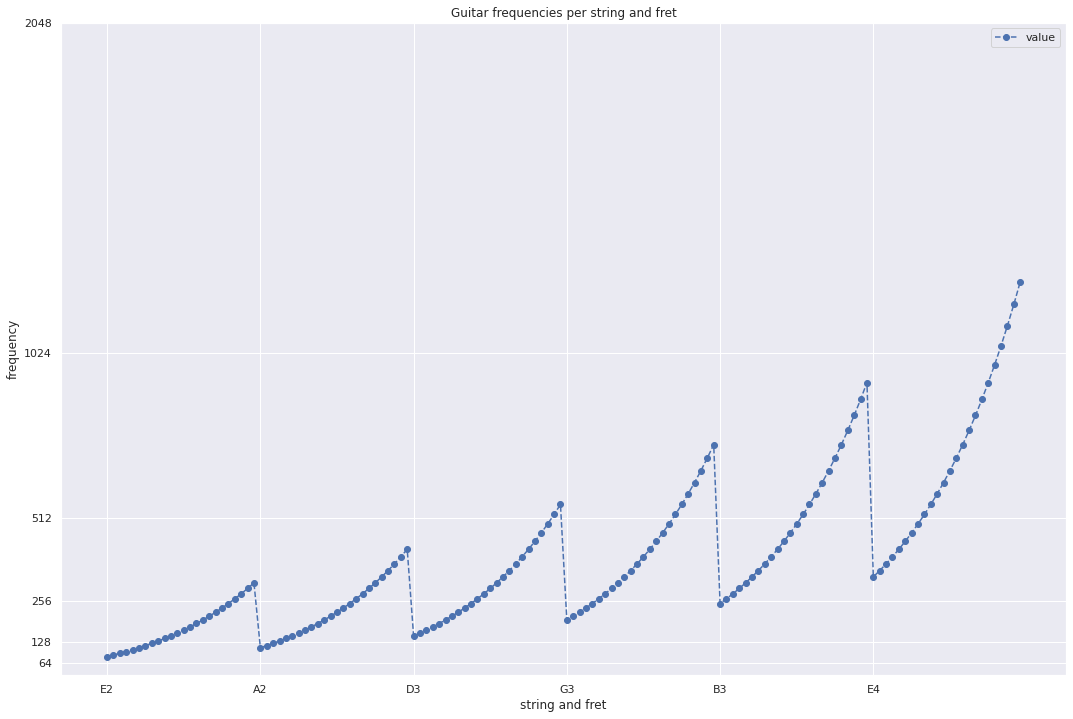

In [126]:
melted_strings = guitar_string_freqs.melt()
xlabels = ['E2','A2','D3','G3','B3','E4']
ylabels = [ 2 ** i for i in range(6,12)]
ax = melted_strings.plot(x='string',y='value',figsize=(18,12),style='o--')
ax.set_xticks(range(0,6 * 24,24))
ax.set_xticklabels(xlabels)
ax.set_yticks(ylabels)
ax.set_ylabel('frequency')
ax.set_xlabel('string and fret')
#ax.set_yscale('log')
plt.title('Guitar frequencies per string and fret')
plt.savefig('guitar_frequencies.jpg',format='jpg')
melted_strings

In [141]:
foo = np.arange(1,11)
print (foo.mean())

### geometric mean ###

gm = np.power(foo.prod(),1/len(foo))

print (gm)

prod = foo.prod()
print(prod)

gm_prod = gm ** len(foo)
gm_prod

5.5
4.528728688116765
3628800


3628800.0000000056